In [1]:
# import numpy
import numpy as np
import csv
import matplotlib.pyplot as plt # matplotlib.pyplot für Diagramme
import math #für das pi
from scipy import optimize

here starts the analysis of experiment 1, where the 2 pendulums looked at individually


In [2]:
#for pendulum P1

# list
time1 = []
distance1 = []

#opening the file and declaring the lists
#task 1 
with open('14Di_M2_25-10-2022_Messreihe1.csv','r' ) as csvfile: #r steht für read , mit w würde man auch Schreibrechte bekommen
    readCSV = csv.DictReader(csvfile, delimiter=';')
    
    for row in readCSV:
        timeVal = row['Zeit (s) Messreihe #1'].replace(',', '.')
        time1.append(float(timeVal))
        distanceVal = row['Position (m) Messreihe #1'].replace(',', '.')
        distance1.append(float(distanceVal))

first peak: 1.575 0.366
last peak: 26.45 0.364


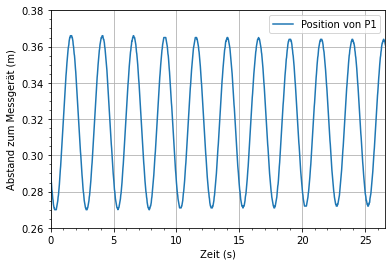

In [3]:
#plot
plt.plot(time1, distance1, label="Position von P1")
plt.xlim(0, 26.6)
plt.ylim(0.26, 0.38)
#get first peak
max_1distance=max(distance1)
max_1time=time1[distance1.index(max_1distance)]
print('first peak:',max_1time, max_1distance)
        
#get last peak
lastmaxtime1 = distance1[len(distance1)-1]
lastmaxdistance1 = 0
xVal = 0
steps = 0
for x in range(len(distance1), 0, -1):
    steps = steps + 1
    if distance1[x-1] > distance1[x-2]:
        lastmaxdistance1 = distance1[x-1]
        xVal = x
        break
        

lastmaxtime1 = time1[len(time1) - steps]
print('last peak:',lastmaxtime1, lastmaxdistance1)


#improving the plot

plt.xlabel("Zeit (s)")
plt.ylabel("Abstand zum Messgerät (m)")
plt.grid()
plt.legend();
plt.minorticks_on()
plt.savefig("Pendel1AuslenkungFuerPeriodendauer.pdf")

In [4]:
#calculating period 
T1=(lastmaxtime1-max_1time)/10
print('period pendulum 1, series of experiments 4:', T1,'s')

period pendulum 1, series of experiments 4: 2.4875 s


In [5]:
#for pendulum P2

#making lists
distance2 = []
time2 = []

#opening the file and declaring the lists


with open('14Di_M2_25-10-2022_Messreihe2.csv','r' ) as csvfile:
    readCSV = csv.DictReader(csvfile, delimiter=';')
    
    for row in readCSV:
        timeVal = row['Zeit (s) Messreihe #1'].replace(',', '.')
        #print(float(timeVal[0]))
        time2.append(float(timeVal))
        
        distanceVal = row['Position (m) Messreihe #1'].replace(',', '.')
        distance2.append(float(distanceVal))
        

first peak: 0.4 0.366
last peak: 25.2 0.36


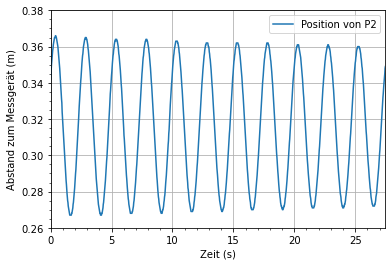

In [6]:
#plot
plt.plot(time2, distance2, label="Position von P2")
plt.xlim(0, 27.475)
plt.ylim(0.26, 0.38)
#get first peak
firstMaxDistance2=max(distance2)
firstMaxTime2=time2[distance2.index(firstMaxDistance2)]


print('first peak:', firstMaxTime2, firstMaxDistance2)

#get last peak
lastmaxdistance1 = 0
xVal = 0
steps = 0
for x in range(1030, 0, -1):
    steps = steps + 1
    if distance2[x-1] > distance2[x-2]:
        lastMaxDistance2 = distance2[x-1]
        xVal = x
        break
        

lastMaxTime2 = time2[1030 - steps]
print('last peak:',lastMaxTime2, lastMaxDistance2)


#improving the plot

plt.xlabel("Zeit (s)")
plt.ylabel("Abstand zum Messgerät (m)")
plt.grid()
plt.legend();
plt.minorticks_on()
plt.savefig("Pendel2AuslenkungFuerPeriodendauer.pdf")

In [7]:
#calculating period 
T2=(lastMaxTime2-firstMaxTime2)/10
print('period pendulum 2, series of experiments 1:', T2,'s')
print(T1, T2)

period pendulum 2, series of experiments 1: 2.48 s
2.4875 2.48


here starts the analysis of experiment 2, where the 2 pendulums are connected by a spring: (we need the "Kopplungsgrad k" and the "relative Frequenzaufspaltung")



2a) Calculation the beat-period and plotting the experiment

The last timepoint is: 462.45
messured beat period of the weaker spring: TsWmess= 84.905


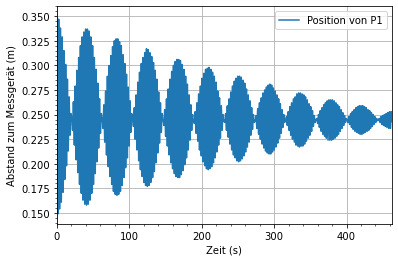

In [8]:
#starting with the softer spring
# list
timeBeatW = []
distanceBeatW = []

#opening the file and declaring the lists
#task 2a, soft spring at 75cm 
with open('14Di_M2_25-10-2022_Messreihe3.csv','r' ) as csvfile:
    readCSV = csv.DictReader(csvfile, delimiter=';')
    
    for row in readCSV:
        timeVal = row['Zeit (s) Messreihe #1'].replace(',', '.')
        timeBeatW.append(float(timeVal))
        distanceVal = row['Position (m) Messreihe #1'].replace(',', '.')
        distanceBeatW.append(float(distanceVal))
        
#plot
#%matplotlib notebook
plt.plot(timeBeatW, distanceBeatW, label="Position von P1")
upperLimit=timeBeatW[len(distanceBeatW)-1]
print('The last timepoint is:',upperLimit)
plt.xlim(0, upperLimit)


#Beat period: 
# getting the timevalue with mathplotlib notebook an two max's equal to one Ts
timeFirstBeatW= 20.3 #s
timeLastBeatW=444.825 #s
#distance first beat = distance last beat = 0.246m 
TsWmess=(timeLastBeatW-timeFirstBeatW)/5
print('messured beat period of the weaker spring: TsWmess=', TsWmess)


#improving the plot

plt.xlabel("Zeit (s)")
plt.ylabel("Abstand zum Messgerät (m)")
plt.grid()
plt.legend();
plt.minorticks_on()
plt.savefig("weicheFederSchwebungen.pdf")

The last timepoint is: 233.85
messured beat period of the stronger spring: TsSmess= 44.615


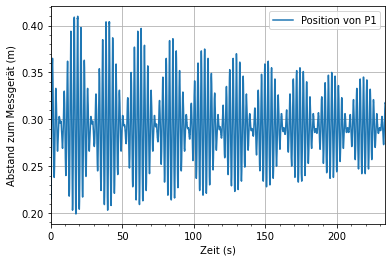

In [9]:
# stronger spring
# list
timeBeatS = []
distanceBeatS = []

#opening the file and declaring the lists
#task 2a, strong spring at 75cm
with open('14Di_M2_25-10-2022_Messreihe4.csv','r' ) as csvfile:
    readCSV = csv.DictReader(csvfile, delimiter=';')
    
    for row in readCSV:
        timeVal = row['Zeit (s) Messreihe #1'].replace(',', '.')
        timeBeatS.append(float(timeVal))
        distanceVal = row['Position (m) Messreihe #1'].replace(',', '.')
        distanceBeatS.append(float(distanceVal))
        
#plot
#%matplotlib notebook
plt.plot(timeBeatS, distanceBeatS, label="Position von P1")
upperLimit=timeBeatS[len(distanceBeatS)-1]
print('The last timepoint is:',upperLimit)
plt.xlim(0, upperLimit)


#Beat period: also with matplotlib notebook
timeFirstBeatS= 6.7 #s
timeLastBeatS=229.775 #s
#distance first beat =0.296m distance last beat = 0.291m -> no vaue thta match -> uncertainty
TsSmess=(timeLastBeatS-timeFirstBeatS)/5
print('messured beat period of the stronger spring: TsSmess=', TsSmess)

#improving the plot

plt.xlabel("Zeit (s)")
plt.ylabel("Abstand zum Messgerät (m)")
plt.grid()
plt.legend();
plt.minorticks_on()
plt.savefig("harteFederSchwebungen.pdf")

2b: Calculating Tgl and Tgeg

the first min of this experiment is at: 0.35 0.153
the index of 24s is: 960 24.0 0.336
the "last" min of this experiment is at: 25.15 0.155
TglW: 2.4799999999999995


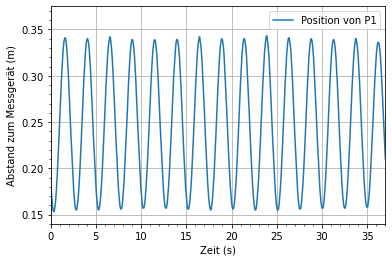

In [10]:
#weak
#period Tgl (both pendulums are in phase)
timeGlW = []
distanceGlW = []

#opening the file and declaring the lists
#task 2b, soft spring Tgl 
with open('14Di_M2_25-10-2022_Messreihe5.csv','r' ) as csvfile:
    readCSV = csv.DictReader(csvfile, delimiter=';')
    
    for row in readCSV:
        timeVal = row['Zeit (s) Messreihe #1'].replace(',', '.')
        timeGlW.append(float(timeVal))
        distanceVal = row['Position (m) Messreihe #1'].replace(',', '.')
        distanceGlW.append(float(distanceVal))
        
plt.plot(timeGlW,distanceGlW, label="Position von P1")
upperLimit=timeGlW[len(distanceGlW)-1]
plt.xlim(0, upperLimit)
plt.ylim(0.14, 0.375)

#find firt min
firstMinDistanceGlW = 0
xVal = 0
steps = 0
limitLastMin = 0
for x in range(0, len(distanceGlW)):
    steps = steps + 1
    if distanceGlW[x+1] > distanceGlW[x]:
        firstMinDistanceGlW = distanceGlW[x]
        xVal = x
        break
firstMinTimeGlW=timeGlW[steps-1]
print('the first min of this experiment is at:', firstMinTimeGlW, firstMinDistanceGlW)

#estimated interval at 24 s

for i in range(len(timeGlW)):
    if timeGlW[i] == 24:
        limitLastMin = i
        print('the index of 24s is:', limitLastMin, timeGlW[limitLastMin], distanceGlW[limitLastMin])
    


lastMinDistanceGlW = 0 #I mean the min after 10 periods (T) so that our accuracy is comparable
xVal = 0
steps = 0
for x in range(limitLastMin, len(distanceGlW)):
    steps = steps + 1
    if distanceGlW[x+1] > distanceGlW[x]:
        lastMinDistanceGlW = distanceGlW[x]
        xVal = x
        break
lastMinTimeGlW=timeGlW[limitLastMin+steps-1]
print('the "last" min of this experiment is at:', lastMinTimeGlW, lastMinDistanceGlW)


# period Tgl 
TglW=(lastMinTimeGlW-firstMinTimeGlW)/10
print('TglW:',TglW)

#improving the plot
plt.xlabel("Zeit (s)")
plt.ylabel("Abstand zum Messgerät (m)")
plt.grid()
plt.legend();
plt.minorticks_on()
plt.savefig("weicheFederGleichsinnigePeriodendauer.pdf")

the first max of this experiment is at: 0.525 0.351
the index of 23s is: 920 23.0 0.181
the "last" max of this experiment is at: 23.875 0.347
TgegW: 2.335


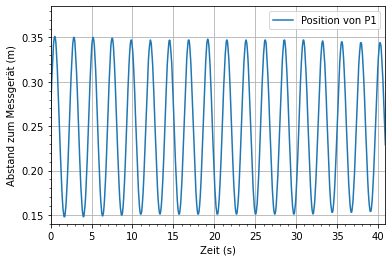

In [11]:
#weak
# period Tgeg(out of phase oscillation)
timeGegW = []
distanceGegW = []

#opening the file and declaring the lists
#task 2b, soft spring Tgeg 
with open('14Di_M2_25-10-2022_Messreihe7.csv','r' ) as csvfile:
    readCSV = csv.DictReader(csvfile, delimiter=';')
    
    for row in readCSV:
        timeVal = row['Zeit (s) Messreihe #1'].replace(',', '.')
        timeGegW.append(float(timeVal))
        distanceVal = row['Position (m) Messreihe #1'].replace(',', '.')
        distanceGegW.append(float(distanceVal))
        
plt.plot(timeGegW,distanceGegW, label="Position von P1")

plt.xlim(0,timeGegW[len(distanceGegW)-1])
plt.ylim(0.14, 0.385)

#find firt max
firstMaxDistanceGegW = 0
xVal = 0
steps = 0
limitLastMin = 0
for x in range(0, len(distanceGegW)):
    steps = steps + 1
    if distanceGegW[x+1] < distanceGegW[x]:
        firstMaxDistanceGegW = distanceGegW[x]
        xVal = x
        break
firstMaxTimeGegW=timeGegW[steps-1]
print('the first max of this experiment is at:', firstMaxTimeGegW, firstMaxDistanceGegW)

#estimated interval after 23s for 10 periods

for i in range(len(timeGegW)):
  if timeGegW[i] == 23:
    limitLastMax = i
    print('the index of 23s is:', limitLastMax, timeGegW[limitLastMax], distanceGegW[limitLastMax])



lastMaxDistanceGegW = 0 #I mean the max after 10 periods (T) so that our accuracy is comparable
xVal = 0
steps = 0
for x in range(limitLastMax, len(distanceGegW)):
    steps = steps + 1
    if distanceGegW[x+1] < distanceGegW[x]:
        lastMaxDistanceGegW = distanceGegW[x]
        xVal = x
        break
lastMaxTimeGegW=timeGegW[limitLastMax+steps-1]
print('the "last" max of this experiment is at:', lastMaxTimeGegW, lastMaxDistanceGegW)


# period TgegW
TgegW=(lastMaxTimeGegW-firstMaxTimeGegW)/10
print('TgegW:',TgegW)

#improving the plot
plt.xlabel("Zeit (s)")
plt.ylabel("Abstand zum Messgerät (m)")
plt.grid()
plt.legend();
plt.minorticks_on()
plt.savefig("weicheFederGegensinnigePeriodendauer.pdf")

the first min of this experiment is at: 1.3 0.193
the index of 25s is: 1000 25.0 0.365
the "last" min of this experiment is at: 25.95 0.198
TglS: 2.465
for comparison: 2.4799999999999995 2.4875 2.48


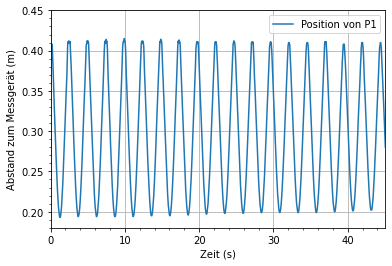

In [12]:
#strong
#period Tgl (both pendulums are in phase)
timeGlS = []
distanceGlS = []

#opening the file and declaring the lists
#task 2b, strong spring Tgl 
with open('14Di_M2_25-10-2022_Messreihe6.csv','r' ) as csvfile:
    readCSV = csv.DictReader(csvfile, delimiter=';')
    
    for row in readCSV:
        timeVal = row['Zeit (s) Messreihe #1'].replace(',', '.')
        timeGlS.append(float(timeVal))
        distanceVal = row['Position (m) Messreihe #1'].replace(',', '.')
        distanceGlS.append(float(distanceVal))
        
plt.plot(timeGlS,distanceGlS, label="Position von P1")

plt.xlim(0,timeGlS[len(distanceGlS)-1])
plt.ylim(0.18, 0.45)

#find firt min
firstMinDistanceGlS = 0
xVal = 0
steps = 0
limitLastMin = 0
for x in range(18, len(distanceGlS)):
    steps = steps + 1
    if distanceGlS[x+1] > distanceGlS[x]:
        firstMinDistanceGlS = distanceGlS[x]
        xVal = x
        break
firstMinTimeGlS=timeGlS[18+steps-1]
print('the first min of this experiment is at:', firstMinTimeGlS, firstMinDistanceGlS)

#estimated interval at 25 s

for i in range(len(timeGlS)):
    if timeGlS[i] == 25:
        limitLastMin = i
        print('the index of 25s is:', limitLastMin, timeGlS[limitLastMin], distanceGlS[limitLastMin])
    


lastMinDistanceGlS = 0 #I mean the min after 10 periods (T) so that our accuracy is comparable
xVal = 0
steps = 0
for x in range(limitLastMin, len(distanceGlS)):
    steps = steps + 1
    if distanceGlS[x+1] > distanceGlS[x]:
        lastMinDistanceGlS = distanceGlS[x]
        xVal = x
        break
lastMinTimeGlS=timeGlS[limitLastMin+steps-1]
print('the "last" min of this experiment is at:', lastMinTimeGlS, lastMinDistanceGlS)


# period Tgl 
TglS=(lastMinTimeGlS-firstMinTimeGlS)/10
print('TglS:',TglS)
print('for comparison:', TglW, T1, T2)

#improving the plot
plt.xlabel("Zeit (s)")
plt.ylabel("Abstand zum Messgerät (m)")
plt.grid()
plt.legend();
plt.minorticks_on()
plt.savefig("harteFederGleichsinnigePeriodendauer.pdf")

the first min of this experiment is at: 2.05 0.207
the index of 23,5s is: 940 23.5 0.339
the "last" min of this experiment is at: 24.3 0.212
TgegS: 2.225


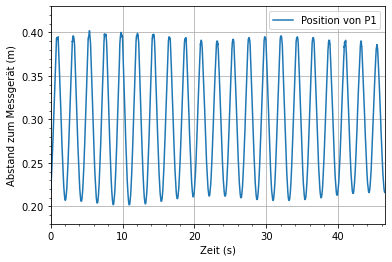

In [13]:
#strong
# period Tgeg(out of phase oscillation)
timeGegS = []
distanceGegS = []

#opening the file and declaring the lists
#task 2b, strong spring Tgeg 
with open('14Di_M2_25-10-2022_Messreihe8.csv','r' ) as csvfile:
    readCSV = csv.DictReader(csvfile, delimiter=';')
    
    for row in readCSV:
        timeVal = row['Zeit (s) Messreihe #1'].replace(',', '.')
        timeGegS.append(float(timeVal))
        distanceVal = row['Position (m) Messreihe #1'].replace(',', '.')
        distanceGegS.append(float(distanceVal))
        
plt.plot(timeGegS,distanceGegS, label="Position von P1")

plt.xlim(0,timeGegS[len(distanceGegS)-1])
plt.ylim(0.18, 0.43)

#find first min
firstMinDistanceGegS = 0
xVal = 0
steps = 0
limitLastMin = 0
for x in range(50, len(distanceGegS)): #skipping the first max
    steps = steps + 1
    if distanceGegS[x+1] > distanceGegS[x]:
        if distanceGegS[x+2]> distanceGegS[x]:
            firstMinDistanceGegS = distanceGegS[x]
            xVal = x
            break
firstMinTimeGegS=timeGegS[50+steps-1]
print('the first min of this experiment is at:', firstMinTimeGegS, firstMinDistanceGegS)

#estimated interval after 23.5s for 10 periods

for i in range(len(timeGegS)):
      if timeGegS[i] == 23.5:
            limitLastMin = i
print('the index of 23,5s is:', limitLastMin, timeGegS[limitLastMin], distanceGegS[limitLastMin])



lastMinDistanceGegS = 0 #I mean the min after 10 periods (T) so that our accuracy stays comparable
xVal = 0
steps = 0
for x in range(limitLastMin, len(distanceGegS)):
    steps = steps + 1
    if distanceGegS[x+1] > distanceGegS[x]:
        lastMinDistanceGegS = distanceGegS[x]
        xVal = x
        break
lastMinTimeGegS=timeGegS[limitLastMin+steps-1]
print('the "last" min of this experiment is at:', lastMinTimeGegS, lastMinDistanceGegS)


# period TgegW
TgegS=(lastMinTimeGegS-firstMinTimeGegS)/10
print('TgegS:',TgegS)

#improving the plot
plt.xlabel("Zeit (s)")
plt.ylabel("Abstand zum Messgerät (m)")
plt.grid()
plt.legend();
plt.minorticks_on()
plt.savefig("harteFederGegensinnigePeriodendauer.pdf")

Task 2c : degree of coupling, weak spring

[[1.18518518e-05]]
Unsicherheit von der Steigung also Unsicherheit von kWs= [0.00344265]
the degree of coupling (static) kWs= [0.05066667]
comparing value for k 0.05
the degree of coupling (dynamic) kWd= 0.060173883065254494


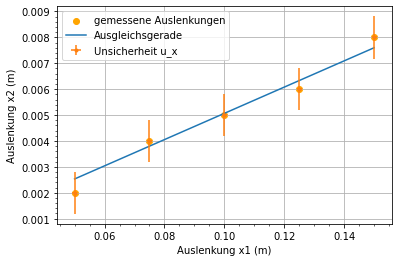

In [14]:
# degree of couplin static by curve fitting/ line fitting weak spring
#static
x1W = np.array([0.05, 0.075, 0.1, 0.125, 0.15])#in m
x2W = np.array([0.002, 0.004, 0.005, 0.006, 0.008]) # in m

plt.scatter(x1W, x2W, label = "gemessene Auslenkungen", color='orange')
#unsicherheit der abgelesenenwerte, dreiecksunsicherheit, so wie bei Faden +/- 0.002
u_x=0.004/(2*np.sqrt(6))
def ausgleichsGerade(x, m):
    y = m * x 
    return y
opt, cov = optimize.curve_fit(ausgleichsGerade, 
                              x1W, 
                              x2W, sigma=u_x * np.ones_like(x1W),
                              absolute_sigma=True
                              )
m_opt = opt
kWs=m_opt
print( cov) # das sind die Unsicherhheiten für die lineare Regression
print('Unsicherheit von der Steigung also Unsicherheit von kWs=',np.sqrt(np.diag(cov)))
plt.plot(x1W, ausgleichsGerade(x1W, kWs), label = "Ausgleichsgerade")

print('the degree of coupling (static) kWs=',kWs)
print('comparing value for k',sum(x2W)/sum(x1W))

#errorbars

plt.errorbar(x1W, 
             x2W, 
             xerr=u_x,
             yerr=u_x, 
             marker=".", linestyle="", label="Unsicherheit u_x")


#dynamic

kWd=(TglW**2-TgegW**2)/(TglW**2+TgegW**2)

print('the degree of coupling (dynamic) kWd=', kWd)

#improving the plot
plt.xlabel("Auslenkung x1 (m)")
plt.ylabel("Auslenkung x2 (m)")
plt.grid()
plt.legend();
plt.minorticks_on()
plt.savefig("weicheFederKopplungsgradStatisch.pdf")

[[1.18518519e-05]]
Unsicherheit von der Steigung also Unsicherheit von kSs= [0.00344265]
he degree of couplin K= [0.09955556]
comparison for k 0.1
the degree of coupling (dynamic) kSd= 0.10207810934219642


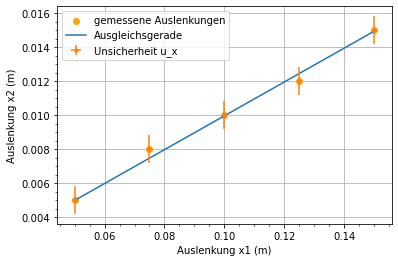

In [15]:
# stronger spring, degree of coupling
# static
x1S = np.array([0.05, 0.075, 0.1, 0.125, 0.15])#in m
x2S =np.array([0.005, 0.008, 0.01, 0.012, 0.015]) # in m

plt.scatter(x1S, x2S, label="gemessene Auslenkungen"  , color='orange')

opt, cov = optimize.curve_fit(ausgleichsGerade, 
                              x1S, 
                              x2S, sigma=u_x * np.ones_like(x1S),
                              absolute_sigma=True
                              )
m_opt = opt

kSs=m_opt
print(cov) # das sind die Unsicherhheiten für die lineare Regression
plt.plot(x1S, ausgleichsGerade(x1S, kSs), label = "Ausgleichsgerade")
print('Unsicherheit von der Steigung also Unsicherheit von kSs=',np.sqrt(np.diag(cov)))

print('he degree of couplin K=',kSs)
print('comparison for k', sum(x2S)/sum(x1S))


#errorbars

plt.errorbar(x1S, 
             x2S, 
             xerr=u_x,
             yerr=u_x, 
             marker=".", linestyle="", label="Unsicherheit u_x")

#dynamic

kSd=(TglS**2-TgegS**2)/(TglS**2+TgegS**2)

print('the degree of coupling (dynamic) kSd=', kSd)

#improving the plot
plt.xlabel("Auslenkung x1 (m)")
plt.ylabel("Auslenkung x2 (m)")
plt.grid()
plt.legend();
plt.minorticks_on()
plt.savefig("harteFederKopplungsgradStatisch.pdf")


Task 2d: calculating the beat period TsCalc with the use of Tgl and Tgeg

In [16]:
#softer Spring (TglW and TgegW) and formula
#Ts=4*np.pi/(wgeg-wgl)
l=1.6 #m
g=9.81 #m/s^2
w0=(g/l)**(1/2)
print('w0 which should be equal to wglW and wglS is=', w0, '1/s')

wglW=(2*np.pi)/TglW
print('wglW=', wglW)

wgegW=(2*np.pi)/TgegW
print('wgegW=', wgegW)

TsWcalc=(4*np.pi)/(wgegW-wglW)
print('The beat period TsWcalc calculated using TgegW and TglW is=', TsWcalc, 's')

w0 which should be equal to wglW and wglS is= 2.4761361028828768 1/s
wglW= 2.5335424625724143
wgegW= 2.690871651897039
The beat period TsWcalc calculated using TgegW and TglW is= 79.87310344827615 s


In [17]:
#stronger Spring (TglS and TgegS) and formula
#Ts=4*np.pi/(wgeg-wgl)
l=1.6 #m
g=9.81 #m/s^2
w0=(g/l)**(1/2)
print('w0 which should be equal to wglW and wglS is=', w0, '1/s')

wglS=(2*np.pi)/TglS
print('wglS=', wglS)

wgegS=(2*np.pi)/TgegS
print('wgegS=', wgegS)

TsScalc=(4*np.pi)/(wgegS-wglS)
print('The beat period TsS calculated using TgegS and TglS is=', TsScalc, 's')
print('das Verhältnis von TsS/TsW=', TsScalc/TsWcalc,'Also ist TsS=TsW*', TsScalc/TsWcalc)

w0 which should be equal to wglW and wglS is= 2.4761361028828768 1/s
wglS= 2.548959556665147
wgegS= 2.823903508844758
The beat period TsS calculated using TgegS and TglS is= 45.70520833333337 s
das Verhältnis von TsS/TsW= 0.5722227678674202 Also ist TsS=TsW* 0.5722227678674202


Task 2e: calculating the frequency splitting with the use of Ts from task 2a and Tgl. But I dont know what they mean by that so i just use formula (40) and use different k's

In [18]:
# weak spring

frequencySplittingWd=((1+kWd)/(1-kWd))**(1/2)-1
print('Vermutlich eigentlich nicht nötig:Frequenzaufspaltung schwache Feder: 1.staisches k:w/w0=', frequencySplittingWs,)
print('Frequenzaufspaltung schwache Feder dynamisches k:w/w0=', frequencySplittingWd)

Vermutlich eigentlich nicht nötig:Frequenzaufspaltung schwache Feder: 1.staisches k:w/w0= [0.05201786]
Frequenzaufspaltung schwache Feder dynamisches k:w/w0= 0.062098501070663614


In [19]:
#strong spring
frequencySplittingSd=((1+kSd)/(1-kSd))**(1/2)-1
print('Frequenzaufspaltung starke Feder dynamisches k: w/w0=', frequencySplittingSd)

Frequenzaufspaltung starke Feder dynamisches k: w/w0= 0.1078651685393257


In [20]:
#vergleich
print('messured Ts, weaker spring:', TsWmess, 'stronger spring:', TsSmess)
print('calculated Ts, weaker spring:', TsWcalc, 'stronger spring', TsScalc)

messured Ts, weaker spring: 84.905 stronger spring: 44.615
calculated Ts, weaker spring: 79.87310344827615 stronger spring 45.70520833333337


In [21]:
#Direkte Unsicherheiten 
n=10
dt = np.mean (np.diff(time1))
print (dt)
#Messunsicherheiten der Strecken
ul=0.004/(2*np.sqrt(6))
print("Unsicherheit des Fadens mit Dreiecksunsicherheit ul", round(ul, 4),"m")

#Unsicherheit des Messgerätes (Annahme von Messtoleranz +-0.5%)
u_diff=dt/(2*np.sqrt(3)) #Unsicherheit digitale Datenaufnahme 
u_p = 2*dt / (2*np.sqrt(6)) #Unsicherheit der peaks 
k=np.sqrt(2)/10 *u_p

uT=0.0005*((lastmaxtime1-max_1time)/n)

ukat=np.sqrt((k)**2+(uT)**2)

print ("Die Unsicherheit für die Periodendauer T1 beträgt damit", ukat, "s")

dt = np.mean (np.diff(time2))
print (dt)
#Unsicherheit des Messgerätes (Annahme von Messtoleranz +-0.5%)
u_diff=dt/(2*np.sqrt(3)) #Unsicherheit digitale Datenaufnahme 
u_p = 2*dt / (2*np.sqrt(6)) #Unsicherheit der peaks 
k=np.sqrt(2)/10 *u_p

#Unsicherheit des Messgerätes (Annahme von Messtoleranz +-0.5%)
uT2=0.0005*((lastMaxTime2-firstMaxTime2)/n)

ukat2=np.sqrt((k)**2+(uT2)**2)

print ("Die Unsicherheit für die Periodendauer T2 beträgt damit", ukat2, "s")

0.025
Unsicherheit des Fadens mit Dreiecksunsicherheit ul 0.0008 m
Die Unsicherheit für die Periodendauer T1 beträgt damit 0.001905320811788223 s
0.025
Die Unsicherheit für die Periodendauer T2 beträgt damit 0.0019028750177910616 s


In [22]:
#Unsicherheiten Aufgabe 2
dt = np.mean (np.diff(timeGlW))
#Unsicherheit des Messgerätes (Annahme von Messtoleranz +-0.5%)
u_diff=dt/(2*np.sqrt(3)) #Unsicherheit digitale Datenaufnahme 
u_p = 2*dt / (2*np.sqrt(6)) #Unsicherheit der peaks 
k=np.sqrt(2)/10 *u_p

#Unsicherheit des Messgerätes (Annahme von Messtoleranz +-0.5%)
uTglW=0.0005*(TglW)

ukatglW=np.sqrt((k)**2+(uTglW)**2)

print ("Die Unsicherheit für die Periodendauer Tgl beträgt damit", round(ukatglW, 4), "s")

u_wgl=(abs(-(2*np.pi)/((TglW)**2)*ukatglW))
print ("Unsicherheit von Omega gleich", u_wgl)

dt = np.mean (np.diff(timeGegW))
#Unsicherheit des Messgerätes (Annahme von Messtoleranz +-0.5%)
u_diff=dt/(2*np.sqrt(3)) #Unsicherheit digitale Datenaufnahme 
u_p = 2*dt / (2*np.sqrt(6)) #Unsicherheit der peaks 
k=np.sqrt(2)/10 *u_p
#Unsicherheiten Aufgabe 2
uA=0.01/(2*np.sqrt(3))
#Unsicherheit des Messgerätes (Annahme von Messtoleranz +-0.5%)
uTgegW=0.0005*(TgegW)

ukatgegW=np.sqrt((k)**2+(uTgegW)**2)

print ("Die Unsicherheit für die Periodendauer Tgeg beträgt damit", round(ukatgegW, 4), "s")

u_wgeg=(abs(-(2*np.pi)/((TgegW)**2)*ukatgegW))
print ("Unsicherheit von Omega gegen", u_wgeg)

Die Unsicherheit für die Periodendauer Tgl beträgt damit 0.0019 s
Unsicherheit von Omega gleich 0.0019439575236056023
Die Unsicherheit für die Periodendauer Tgeg beträgt damit 0.0019 s
Unsicherheit von Omega gegen 0.0021393817317983737


In [23]:
#Unsicherheit Schwebung weiche Feder

u_Ts=np.sqrt(((abs((4*np.pi)/(wgegW-wglW))*u_wgeg)**2+(abs((4*np.pi)/(wgegW-wglW))*u_wgl)**2))

print (u_Ts)

0.2308861207782417


In [24]:
#Unsicherheit starke Feder

dt = np.mean (np.diff(timeGlS))
#Unsicherheit des Messgerätes (Annahme von Messtoleranz +-0.5%)
u_diff=dt/(2*np.sqrt(3)) #Unsicherheit digitale Datenaufnahme 
u_p = 2*dt / (2*np.sqrt(6)) #Unsicherheit der peaks 
k=np.sqrt(2)/10 *u_p


uTglS=0.0005*(TglS)

ukatglS=np.sqrt((k)**2+(uTglS)**2)

print ("Die Unsicherheit für die Periodendauer Tgl beträgt damit", round(ukatglS, 4), "s")

u_wglS=(abs(-(2*np.pi)/((TglS)**2)*ukatglS))
print ("Unsicherheit von Omega gleich", u_wglS)

dt = np.mean (np.diff(timeGegS))
#Unsicherheit des Messgerätes (Annahme von Messtoleranz +-0.5%)
u_diff=dt/(2*np.sqrt(3)) #Unsicherheit digitale Datenaufnahme 
u_p = 2*dt / (2*np.sqrt(6)) #Unsicherheit der peaks 
k=np.sqrt(2)/10 *u_p
#Unsicherheit des Messgerätes (Annahme von Messtoleranz +-0.5%)
uTgegS=0.0005*(TgegS)

ukatgegS=np.sqrt((k)**2+(uTgegS)**2)

print ("Die Unsicherheit für die Periodendauer Tgeg beträgt damit", round(ukatgegS, 4), "s")

u_wgegS=(abs(-(2*np.pi)/((TgegS)**2)*ukatgegS))
print ("Unsicherheit von Omega gegen", u_wgegS)

Die Unsicherheit für die Periodendauer Tgl beträgt damit 0.0019 s
Unsicherheit von Omega gleich 0.001962643228379661
Die Unsicherheit für die Periodendauer Tgeg beträgt damit 0.0018 s
Unsicherheit von Omega gegen 0.002312882629366878


In [25]:
#Unsicherheit Schwebung weiche Feder

u_TsS=np.sqrt(((abs((4*np.pi)/(wgegS-wglS))*u_wgegS)**2+(abs((4*np.pi)/(wgegS-wglS))*u_wglS)**2))

print (u_TsS)

0.13864126692391474


In [26]:
#Unsicherheit Kopplung weich

u_KW=np.sqrt((2*TgegW*((1+kWd)/(TgegW**2+TglW**2)*ukatgegW))**2+(2*TglW*(1-kWd)/(TgegW**2+TglW**2)*ukatglW))

print (u_KW)
             
            

0.027661120367455272


In [27]:
#Unsicherheit Kopplung stark

u_KS=np.sqrt((2*TgegS*((1+kSd)/(TgegS**2+TglS**2)*ukatgegS))**2+(2*TglS*(1-kSd)/(TgegS**2+TglS**2)*ukatglS))

print (u_KS)

0.027615429815112724


In [28]:
# Unsicherheit Frequenzaufspaltung u_fW und u_fS
# Ableitung der k Formel+ abs()
u_fW= abs(1/((kWd-1)**2*((1+kWd)/(1-kWd))**(1/2))*u_KW)
u_fS= abs(1/((kSd-1)**2*np.sqrt((1+kSd)/(1-kSd)))*u_KS)
print('Unsicherheiten von Frequenzaufspaltung u_fW=', u_fW, 'u_fS=', u_fS)

Unsicherheiten von Frequenzaufspaltung u_fW= 0.029485598772853713 u_fS= 0.030916319008069876


Here starts task 3: calculating the frequeny spliting using the approximation (equation 43) until h.o.t. 3
Comparing it to the exact equation (40)



In [29]:
approxFrequencySplittingWd=kWd+0.5*kWd**2+0.5*kWd**3
approxFrequencySplittingSd=kSd+0.5*kSd**2+0.5*kSd**3
print('Approximated frequencysplitting strongspring:', approxFrequencySplittingSd, 'and approximated frequencysplitting weaker spring:', approxFrequencySplittingWd)
print('comparing to frqu.spl. strong spring', frequencySplittingSd, 'frequ.spl weaker spring', frequencySplittingWs)

Approximated frequencysplitting strongspring: 0.10781990345373133 and approximated frequencysplitting weaker spring: 0.06209327285918987
comparing to frqu.spl. strong spring 0.1078651685393257 frequ.spl weaker spring [0.05201786]


In [30]:
# some plot showing the comparison or calculating the difference
print('strong spring diff:', approxFrequencySplittingSd/frequencySplittingSd, 'deviation of :', (1-approxFrequencySplittingSd / frequencySplittingSd)*100,'%')
print('weak spring diff:', approxFrequencySplittingWd/frequencySplittingWd, 'deviation of :', (1-approxFrequencySplittingWd / frequencySplittingWd)*100,'%')


strong spring diff: 0.9995803549356355 deviation of : 0.041964506436453775 %
weak spring diff: 0.9999158077669573 deviation of : 0.00841922330426792 %


In [31]:
#unsicherheit der annäherung ohne die unsicherhheit eh durch taylorn
u_approxfW= abs((1+kWd+3/2*kWd**2)*u_KW)
u_approxfS= abs((1+kWs+3/2*kWs**2)*u_KS)
print('Unsicherheiten von Frequenzaufspaltung u_approxfW=', u_approxfW, 'u_approxfS=', u_approxfS)
print(u_fS-u_approxfS)
print(u_fW-u_approxfW)

Unsicherheiten von Frequenzaufspaltung u_approxfW= 0.029475834458470587 u_approxfS= [0.02912095]
[0.00179537]
9.764314383126083e-06


In [32]:
#Differnez zwischen T1 und T2
print('Delta T ist= ', T1-T2)
print(T1, T2)

Delta T ist=  0.00749999999999984
2.4875 2.48


In [33]:
#Abweichung Tgl von T durchschnitt aus T1 und T2
print(1-(TglW/((T1+T2)/2)))
print(1-(TglS/((T1+T2)/2)))

0.0015098137896326635
0.007549068948162985


In [34]:
#Abweichungen zwischen gemssener und berechneter Schwebungsdauer 
print(TsSmess-TsScalc)
print(TsWmess-TsWcalc)

print(1-TsSmess/TsScalc)
print(1-TsWmess/TsWcalc)

-1.090208333333365
5.031896551723847
0.023853043735898805
-0.06299863576707487


In [35]:
#Differnez zwischen dynamischen und statischen kopplungsgrad
print(kSd-kWd)

0.04190422627694193
